In [27]:
from PyRNAoutlier.expression import expression_outliers as eo
eds = eo.Expressiondataset()

In [28]:
eds.load_counts_file("DATA/41467_2017_BFncomms15824_MOESM390_ESM.txt", skiprows=0)
eds.load_batch_information("DATA/batch_data_kremer.txt") # sampleID   batch (number)

In [29]:
eds.raw_counts

,DDX11L1,OR4F5,M37726,LOC643837,AK056486,SAMD11,KLHL17,PLEKHN1,ISG15,AGRN,...,STRF6,DQ584698,MTND5,cytochrome b,AF079515,DQ582201,JA760602,JA760600,JA760615,tRNA Pro
65937,10,0,0,626,5,317,80,7,45,557,...,0,0,0,0,706,18,37448,0,0,0
66623,17,0,0,525,7,126,106,34,128,1880,...,0,0,0,0,842,20,23645,0,0,0
69245,0,0,0,1268,44,1302,307,57,93,1363,...,0,0,0,0,1085,63,35142,0,0,0
69248,15,0,0,539,14,61,255,16,503,3554,...,0,0,0,0,2271,23,53165,0,0,0
69456,7,0,0,726,54,1163,175,41,87,862,...,0,0,0,0,2540,63,43857,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUC1410,12,0,0,665,10,139,264,19,392,4768,...,0,0,0,0,1611,98,30178,0,0,0
MUC1411,4,0,0,568,18,125,337,30,568,3374,...,0,0,0,0,915,266,23605,0,0,0
MUC1384,4,0,0,476,11,42,111,7,258,2491,...,0,0,0,0,471,155,9280,0,0,0
MUC1412,2,0,0,596,35,685,237,15,271,1878,...,0,0,0,0,683,91,26418,0,0,0


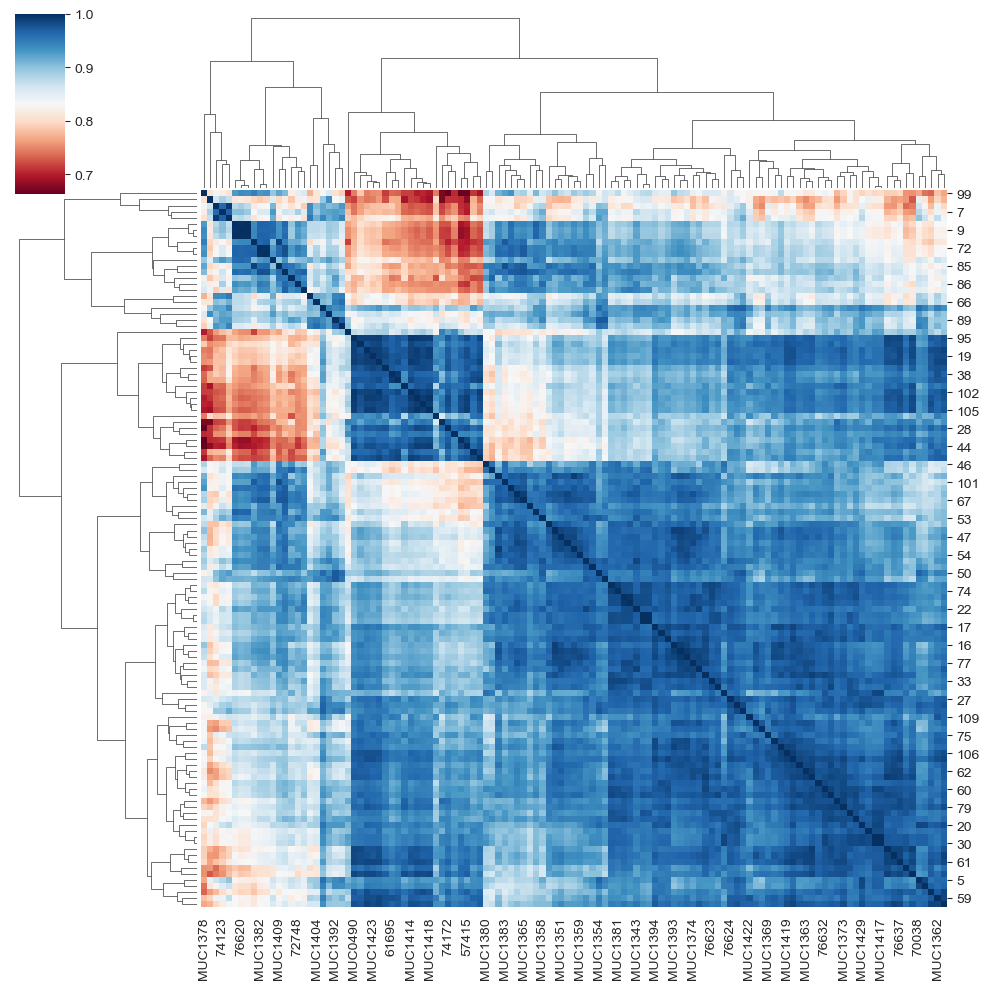

In [30]:
eds.normalize_counts(median_cutoff=1)
eds.plot_correlation_heatmap()

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


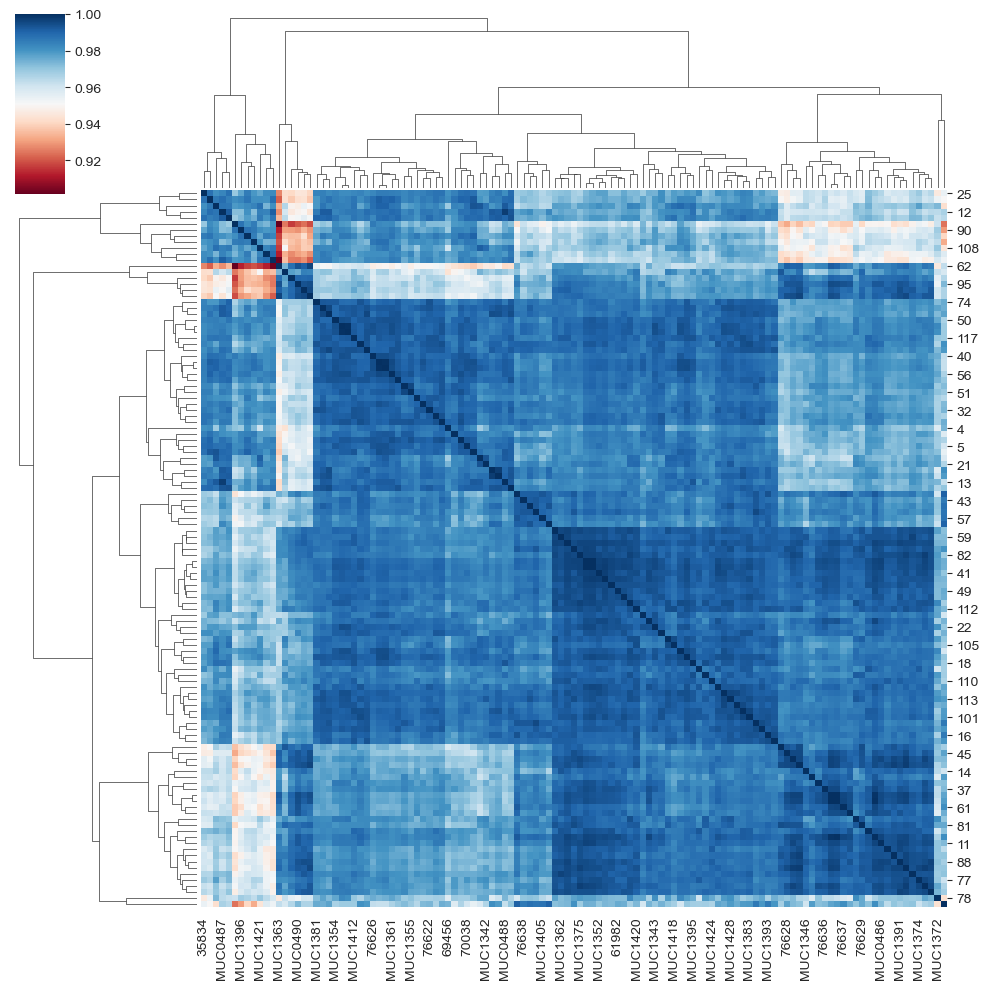

In [31]:
eds.correct_batch_effect()
eds.correct_for_confounders(q=14, method='pca')
eds.plot_correlation_heatmap()

In [32]:
eds.get_pvalues()
eds.get_zscores()
res = eds.get_results(significant=True, pval_cutoff=0.05)

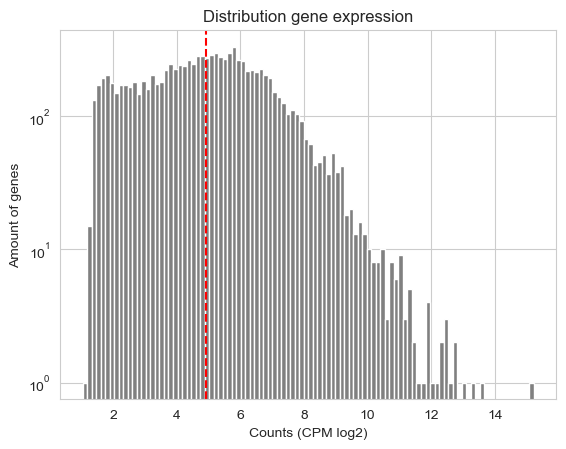

In [33]:
eds.plot_gene_expression_distribution()

In [34]:
res.sort_values('padj')

,index,patient,gene,padj,pValue,zScore,counts(CPM),meanCounts(CPM)
4820,ZFAT,MUC1365,ZFAT,1.723503e-08,9.646572e-16,7.092889,132.0,13.731092
10032,STAG2,76636,STAG2,1.482273e-07,1.659277e-14,-7.140863,47.0,143.361345
403,RPS27,MUC1372,RPS27,3.702808e-06,6.217465e-13,-7.951346,132.0,369.899160
1238,EML6,70038,EML6,4.952990e-06,1.386112e-12,5.776190,34.0,3.663866
86,RPL11,MUC1372,RPL11,4.952990e-06,1.236796e-12,-7.984331,231.0,532.042017
...,...,...,...,...,...,...,...,...
4427,PDGFRL,MUC1343,PDGFRL,4.801741e-02,6.423291e-07,2.099055,18.0,2.957983
4730,SLCO5A1,MUC1372,SLCO5A1,4.963519e-02,6.667482e-07,2.395933,1191.0,432.647059
2732,CPEB2,76624,CPEB2,4.992632e-02,6.734534e-07,2.947295,92.0,45.109244
5024,COL5A1,MUC1372,COL5A1,4.995316e-02,6.794072e-07,-0.719095,2180.0,1174.394958


In [35]:
import pandas as pd
abberant_pt_dict = {pt:len(res[res["patient"] == pt]) for pt in eds.raw_counts.index.unique()}

In [36]:
sorted_pt_abberant = dict(sorted(abberant_pt_dict.items(), key=lambda x: x[1]))

In [37]:
sorted_pt_abberant

{'66623': 0,
 '69245': 0,
 '69248': 0,
 '70041': 0,
 '74123': 0,
 '76619': 0,
 '76620': 0,
 '76621': 0,
 'MUC0486': 0,
 'MUC0487': 0,
 'MUC0488': 0,
 'MUC1377': 0,
 'MUC1393': 0,
 'MUC1395': 0,
 'MUC1423': 0,
 'MUC1342': 0,
 'MUC1345': 0,
 '74172': 0,
 '76635': 0,
 'MUC1417': 0,
 'MUC1348': 0,
 '76626': 0,
 'MUC1352': 0,
 'MUC1402': 0,
 '76638': 0,
 '57415': 0,
 '76628': 0,
 'MUC1380': 0,
 '61982': 0,
 'MUC1355': 0,
 'MUC1357': 0,
 'MUC1361': 0,
 '76632': 0,
 '76637': 0,
 'MUC1363': 0,
 'MUC1364': 0,
 '76633': 0,
 'MUC1415': 0,
 'MUC1404': 0,
 '76627': 0,
 'MUC1379': 0,
 'MUC1367': 0,
 'MUC1382': 0,
 'MUC1437': 0,
 'MUC1370': 0,
 'MUC1374': 0,
 '76629': 0,
 'MUC1375': 0,
 'MUC1407': 0,
 'MUC1376': 0,
 'MUC1409': 0,
 '72748': 0,
 'MUC1390': 0,
 'MUC1391': 0,
 'MUC1392': 0,
 'MUC1397': 0,
 'MUC0490': 0,
 'MUC0491': 0,
 'MUC1368': 0,
 'MUC1413': 0,
 'MUC1414': 0,
 'MUC1416': 0,
 'MUC1425': 0,
 'MUC1418': 0,
 'MUC1419': 0,
 'MUC1426': 0,
 'MUC1422': 0,
 'MUC1427': 0,
 'MUC1420': 0,
 'MUC14

In [38]:
# compare with kremer dataset
positive_calls = pd.read_csv("/Users/timniemeijer/GTEx/DATA/positive_control_calls.txt", sep='\t')
metadata = pd.read_csv("DATA/metadata_kremer.txt", sep='\t')


In [39]:
positive_calls =positive_calls.astype({"FIBROBLAST_ID":str})

In [40]:


metadata["expression_outliers_original"] = [positive_calls[positive_calls["FIBROBLAST_ID"] == row]["NUM_RNA_ABER_EXP_SIGNI"].values for row in metadata["FIBROBLAST_ID"].values]


In [41]:
metadata["expression_outliers_original"] = [v[0] if v else 0 for v in metadata["expression_outliers_original"] ]



In [42]:
metadata["expression_outliers_ours"] = [sorted_pt_abberant[row] if row in sorted_pt_abberant.keys() else 0 for row in metadata["RNA_ID"].values]

In [43]:
metadata['rna_effect'] = [positive_calls[positive_calls["FIBROBLAST_ID"] == row]["RNA_DEFECT_FOR_DIAGNOSIS_GENE"].values for row in metadata["FIBROBLAST_ID"].values]

In [44]:
metadata['rna_effect'] = [v[0] if v else '' for v in metadata["rna_effect"] ]

In [45]:
metadata['disease_gene'] = [positive_calls[positive_calls["FIBROBLAST_ID"] == row]["DIAGNOSIS_GENE"].values for row in metadata["FIBROBLAST_ID"].values]

In [46]:
metadata['disease_gene'] = [v[0] if v else '' for v in metadata["disease_gene"] ]

In [47]:
metadata["found_outlier_result"] = [row[1] in res[res['patient'] == row[0]]["gene"].values for row in metadata[["RNA_ID","disease_gene"]].values]

In [48]:
metadata.to_csv('benchmark_result.tsv',index=False, sep='\t')

Text(0, 0.5, '#outlier genes')

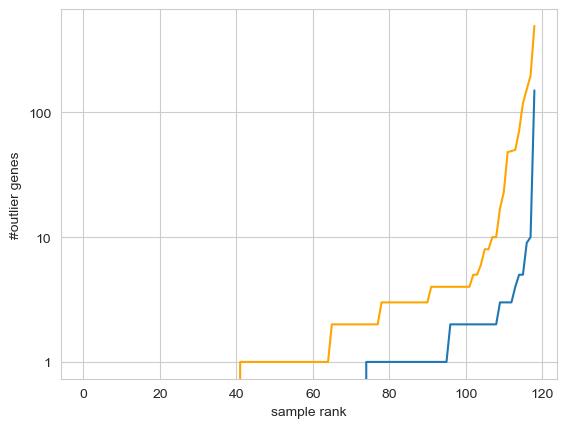

In [49]:
import matplotlib.pyplot as plt


plt.plot(sorted_pt_abberant.values())
plt.plot(metadata.sort_values("expression_outliers_original")["expression_outliers_original"].values, c='orange')
plt.yscale('log')
plt.yticks([1,10,100],labels=[1,10,100])
plt.xlabel('sample rank')
plt.ylabel('#outlier genes')

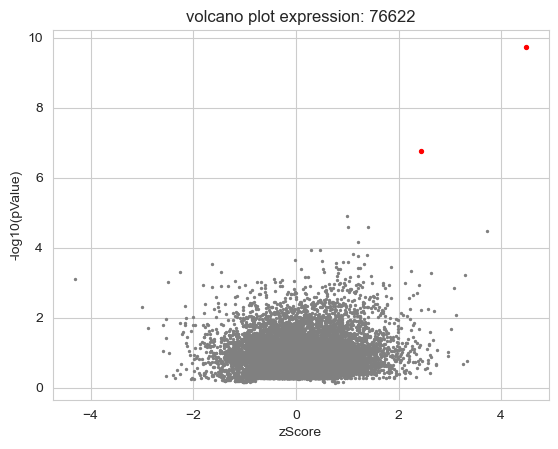

In [50]:
eds.plot_volcano("76622", pval_cutoff=0.05)

In [51]:
res[res["patient"] == "76622"]

,index,patient,gene,padj,pValue,zScore,counts(CPM),meanCounts(CPM)
9375,SNX5,76622,SNX5,0.016511,1.746609e-07,2.431282,168.0,110.714286
10284,AF079515,76622,AF079515,0.000086,1.837080e-10,4.487707,132.0,28.857143


In [52]:
metadata[metadata['found_outlier_result']] 

,FIBROBLAST_ID,RNA_ID,SEX,RNA_HOX_GROUP,RNA_BATCH_GROUP,expression_outliers_original,expression_outliers_ours,rna_effect,disease_gene,found_outlier_result
2,61695,61695,male,magenta,orange,48,1,aberrant_expression,DNAJC3,True
30,61691,76636,male,magenta,darkgreen,4,3,aberrant_expression,DNAJC3,True
85,73804,MUC1396,male,magenta,darkgreen,6,5,aberrant_expression,MGST1,True
97,83331,MUC1410,male,magenta,orange,1,1,NaN,TALDO1,True
